In [88]:
#The libraries that we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [89]:
#Getting the file from google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/HW1.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [91]:
X123 = df.values[:, 0:3]  # To get x1, x2, x3 (which means columns 0 to 2), I don't know if it's good writing it them like that but it worked
y = df.values[:, 3]
m = len(y)


X0 = np.ones((m, 1))             #For the column
X123 = X123.reshape(m, 3)        # To make sure that the shape is correct
X = np.hstack((X0, X123))        # The final input matrix: [1, x1, x2, x3]


In [92]:
#Parameters
theta = np.zeros(4)   #Initialized thetha to zero as you said
alpha = 0.01         #Explored 0.1 instead of 0.01, I think it's working good
iterations = 1500


In [93]:
#Create function for the cost and gradient decent
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [94]:
#Run the gradient descent
theta_multi, cost_history_multi = gradient_descent(X, y, theta, alpha, iterations)

Final theta (θ0, θ1, θ2, θ3): [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
Final cost: 0.8105104429083869


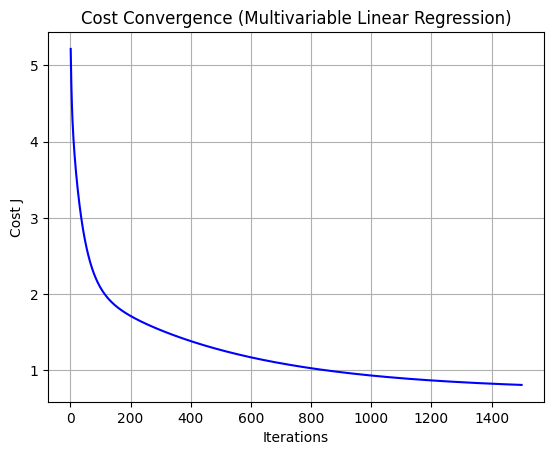


--- Predictions ---
Predict (1, 1, 1): 2.9413640816645295
Predict (2, 0, 4): 0.09179843075891564
Predict (3, 2, 1): -0.012755552822328944


In [95]:
#Displaying and plotting to see the graph
print("Final theta (θ0, θ1, θ2, θ3):", theta_multi)
print("Final cost:", compute_cost(X, y, theta_multi))


plt.plot(range(1, iterations + 1), cost_history_multi, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.title('Cost Convergence (Multivariable Linear Regression)')
plt.grid(True)
plt.show()

def predict(x1, x2, x3, theta):
    return theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x3

#The value for new (X1,X2,X3)
print("\n--- Predictions ---")
print("Predict (1, 1, 1):", predict(1, 1, 1, theta_multi))
print("Predict (2, 0, 4):", predict(2, 0, 4, theta_multi))
print("Predict (3, 2, 1):", predict(3, 2, 1, theta_multi))

## Next change the iterations and learning rate (alpha) and try to take loss to minimum